In [1]:
import pandas as pd
import shap
import xgboost
import sklearn
import time
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl
shap.initjs()

In [2]:
data = pd.read_csv('titanic_data.csv')

In [3]:
data.sample(7)

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
106,106,1,3,0,1,0,0,0,1,2
33,33,0,2,1,4,0,0,1,1,1
694,694,0,1,1,3,0,0,2,1,5
621,621,1,1,1,2,1,0,3,1,1
270,270,0,1,1,1,0,0,2,1,1
625,625,0,1,1,3,0,0,3,1,1
37,37,0,3,1,1,0,0,1,1,1


In [4]:
X = data.drop(['Survived','Unnamed: 0'],axis=1)
Y = data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25)


# SHAP With KNN Model

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn_model = KNeighborsClassifier()

In [12]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
knn_accuracy_train  = round(knn_model.score(X_train, Y_train) * 100, 2)
knn_accuracy_train  

85.63

In [14]:
explainer = shap.KernelExplainer(knn_model.predict_proba, X_train)
knn_shap_values = explainer.shap_values(X_test.iloc[9,:])
shap.force_plot(explainer.expected_value[0], knn_shap_values[0], X_test.iloc[0,:])

Using 668 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [16]:
knn_explainer = shap.KernelExplainer(knn.predict,X_test)
knn_shap_values = knn_explainer.shap_values(X_test)

Using 223 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


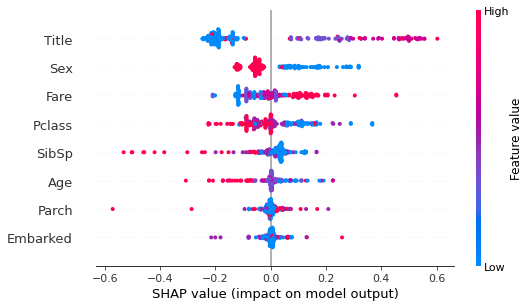

In [17]:
shap.summary_plot(knn_shap_values, X_test)

In [22]:
shap.force_plot(explainer.expected_value[0], knn_shap_values[1], X_test)

# SHAP With Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
decision_accuarcy = round(decision_model.score(X_train,Y_train)*100,2)
decision_accuarcy

89.97

In [34]:
decision_explainer = shap.KernelExplainer(decision_model.predict, X_test)
decision_shap_values = explainer.shap_values(X_test)
shap.force_plot(decision_explainer.expected_value, decision_shap_values, X_test)

Using 223 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


AssertionError: The shap_values arg looks looks multi output, try shap_values[i].

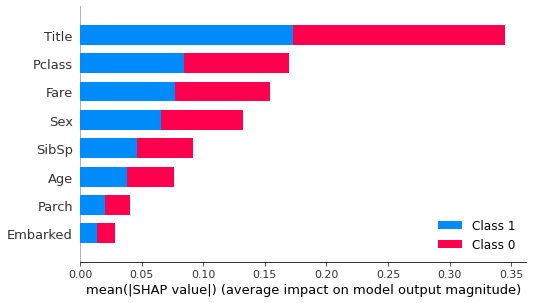

In [24]:
shap.summary_plot(decision_shap_values, X_test)

# SHAP With Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)

In [26]:
rforest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
rforest_explainer = shap.KernelExplainer(rforest.predict_proba,X_train)

Using 668 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [28]:
rforest_shap_values  =  rforest_explainer.shap_values ( X_test ) 


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [29]:
shap.force_plot (rforest_explainer.expected_value[0],  rforest_shap_values[0],  X_test )

# SHAP With SVM Model

In [30]:
from sklearn.svm import SVC

In [31]:
svm_model = SVC(kernel='linear', probability=True)

In [32]:
svm_model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
svm_explainer = shap.KernelExplainer(svm_model.predict_proba, X_train)
svm_shap_values = explainer.shap_values(X_test)
shap.force_plot(svm_explainer.expected_value[0], svm_shap_values[0], X_test)

Using 668 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
